transformation req only for linear,log reg because of assumptions in algorithm

https://www.youtube.com/watch?v=U_wKdCBC-w0

In [2]:
import numpy as np
import pandas as pd
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\mural\anaconda3\lib\site-packages (0.11.2)


In [3]:
df=pd.read_csv("C:/Users/mural/Desktop/New folder/train.csv")

# Age

In [4]:
import seaborn as sns

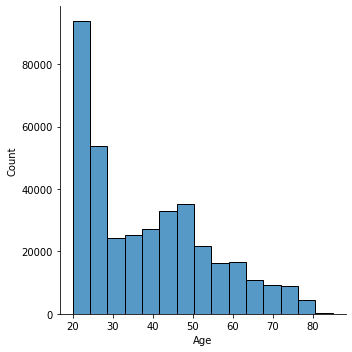

In [5]:
sns.displot(x='Age', data=df,bins=15)

it does not follow normal disb hence transform skewd disb  to a norm disb 

In [6]:
from scipy.stats import skew

In [7]:
skew(df['Age'])

0.6725363506891485

C:\Users\mural\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mural\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\mural\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\mural\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Suppor

<IPython.core.display.Javascript object>

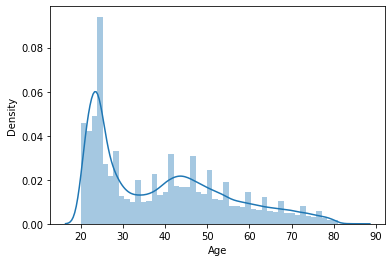

In [8]:
sns.distplot(df['Age'])
plt.show()

# Q-Q plot

In [10]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

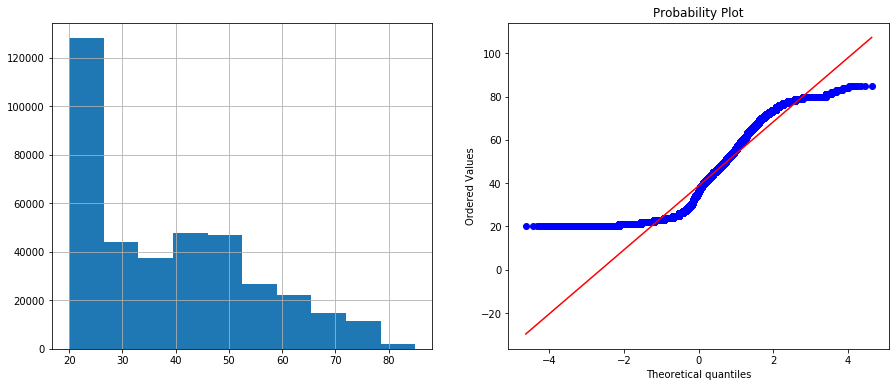

In [14]:
from scipy import stats
diagnostic_plots(df, 'Age')

# Logarithmic Transformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

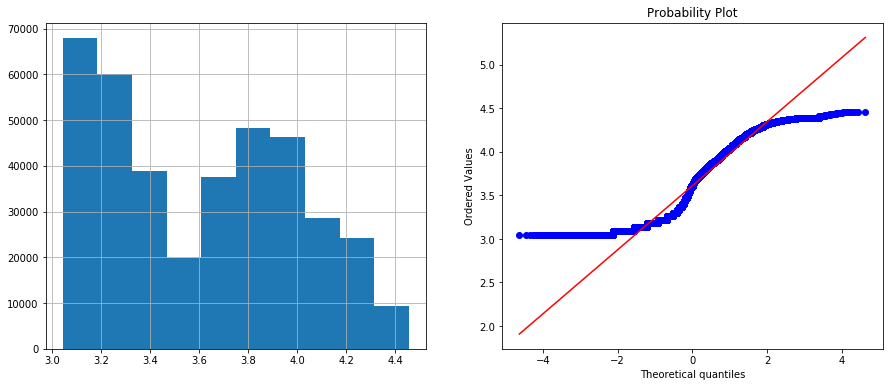

In [18]:

df['Log_Age']=np.log(df['Age']+1)
diagnostic_plots(df,'Log_Age')

In [36]:
skew(df['Log_Age'])

0.21519375049873044

# Reciprocal transformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

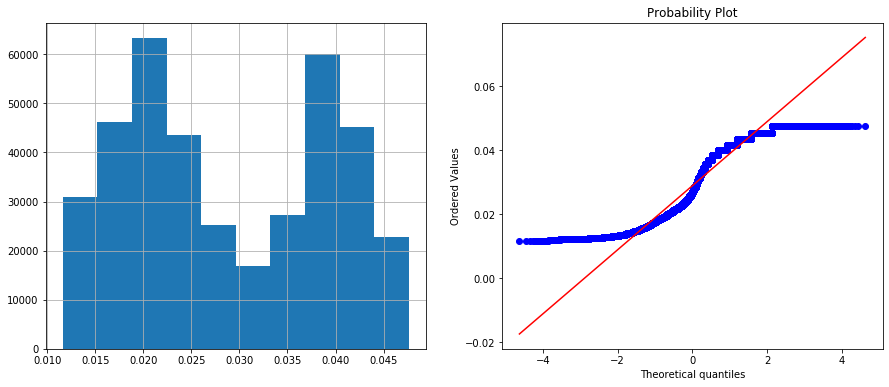

In [19]:

df['Rec_Age']=1/(df['Age']+1)
diagnostic_plots(df,'Rec_Age')

# Sqaure Root Tansformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

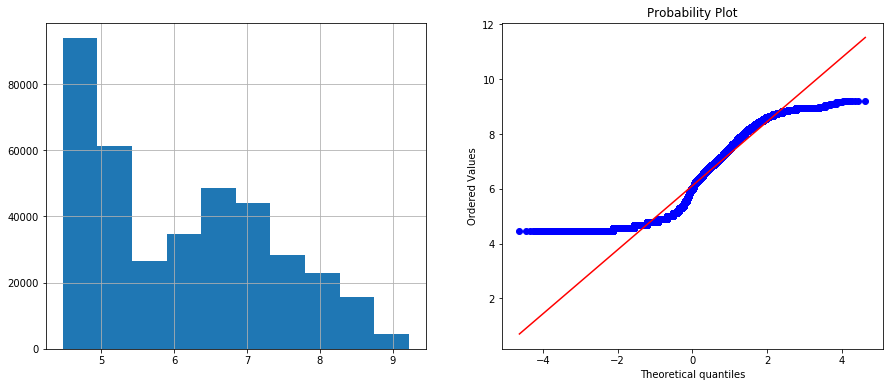

In [30]:
df['sqr_Age']=df['Age']**(1/2)

diagnostic_plots(df,'sqr_Age')

In [32]:
skew(df['sqr_Age'])

0.4260595595149219

# Exponential Tanformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

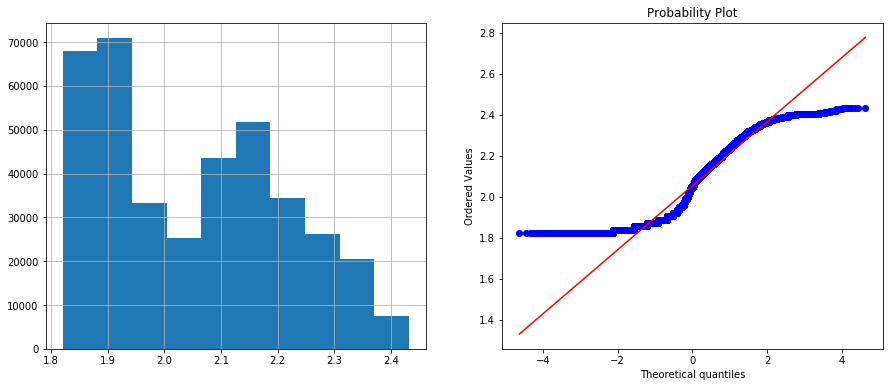

In [43]:
df['Exp_Age']=df['Age']**(1/5)

diagnostic_plots(df,'Exp_Age')

In [35]:
skew(df['Exp_Age'])

0.29005684059514913

# boxcox

Optimal lambda:  -0.38371446757875616


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

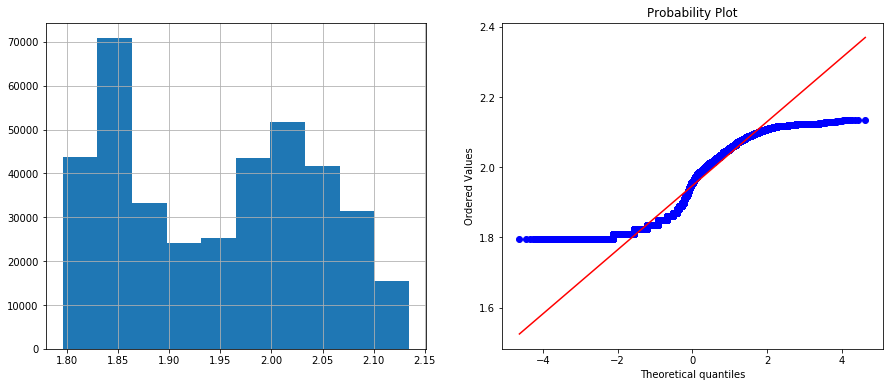

In [44]:
df['Age_boxcox'], param = stats.boxcox(df.Age+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Age_boxcox')

In [15]:
skew(df['Age'])

0.6725363506891485

In [17]:
skew(df['Age_boxcox'])

0.06538515542237305

In [60]:
def best_transformation(a,b,c,d,e,f):
    A=skew(df['Age'])
    B=skew(df['Log_Age'])
    C=skew(df['Rec_Age'])
    D=skew(df['Exp_Age'])
    E=skew(df['Age_boxcox'])
    F=skew(df['sqr_Age'])
    list=[A,B,C,D,E,F]
    list1=["original_skew_value","Log_skew_value","rec_skew_value","expon","boxcox","sqr_Age"]
    z=min(list)
    y=list.index(z)
    
    return z,list1[y]
a,b,c,d,e,f=df['Age'],df['Log_Age'],df['Rec_Age'],df['Exp_Age'],df['Age_boxcox'],df['sqr_Age']

In [62]:
best_transformation(a,b,c,d,e,f)

(0.06538515542237305, 'boxcox')

#after applying various techniques it was found that box cox transform tech works well

# Driving_License

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

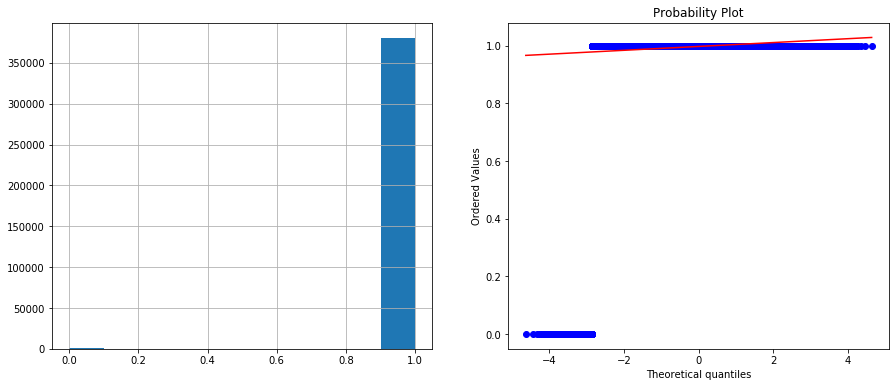

In [96]:
from scipy import stats
diagnostic_plots(df, 'Driving_License')

In [104]:
skew(df['Driving_License'])

-21.595096533393846

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

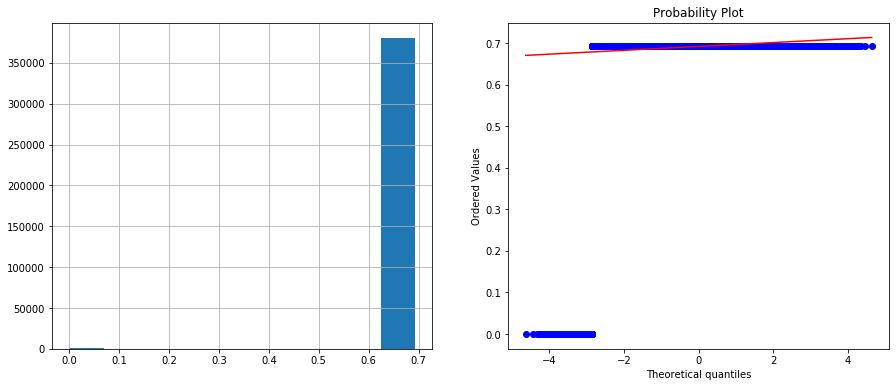

In [97]:
df['Log_Driving_License']=np.log(df['Driving_License']+1)
diagnostic_plots(df,'Log_Driving_License')

In [105]:
skew(df['Log_Driving_License'])

-21.595096533393857

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

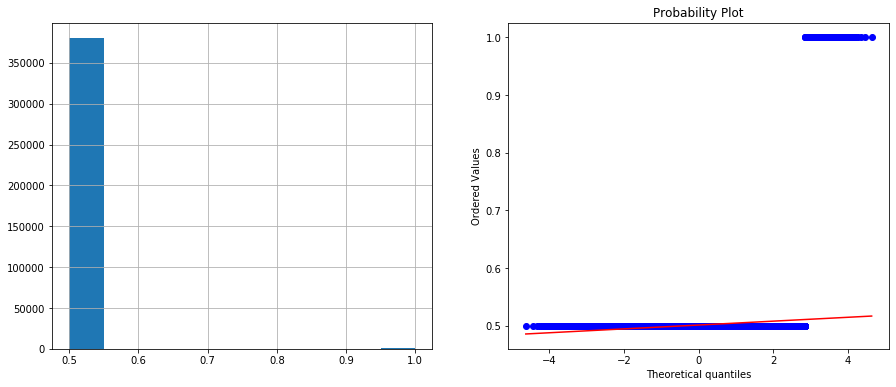

In [98]:
df['Rec_Driving_License']=1/(df['Driving_License']+1)
diagnostic_plots(df,'Rec_Driving_License')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

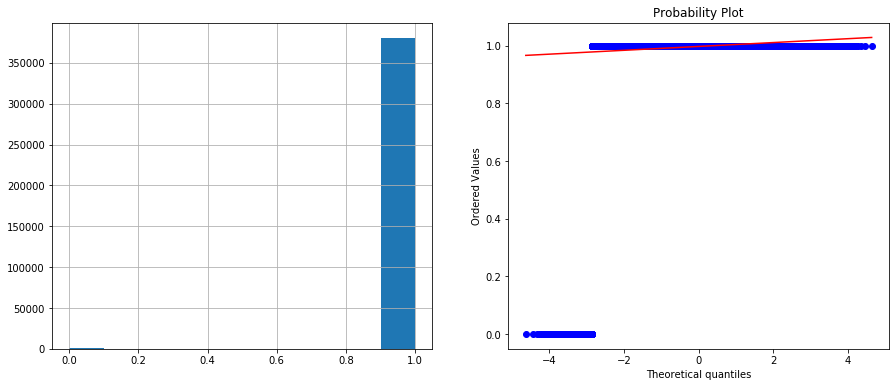

In [99]:
df['Exp_Driving_License']=df['Driving_License']**(1/5)

diagnostic_plots(df,'Exp_Driving_License')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

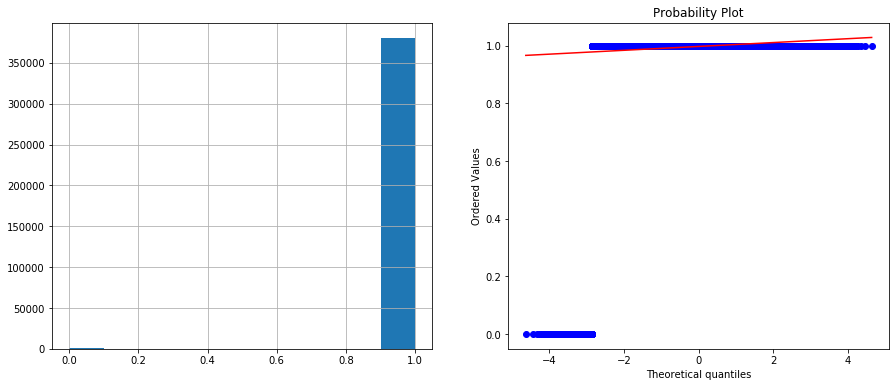

In [100]:
df['sqr_Driving_License']=df['Driving_License']**(1/2)

diagnostic_plots(df,'sqr_Driving_License')

In [106]:
skew(df['sqr_Driving_License'])

-21.595096533393846

C:\Users\mural\Anaconda3\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Optimal lambda:  516.1806026614474


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

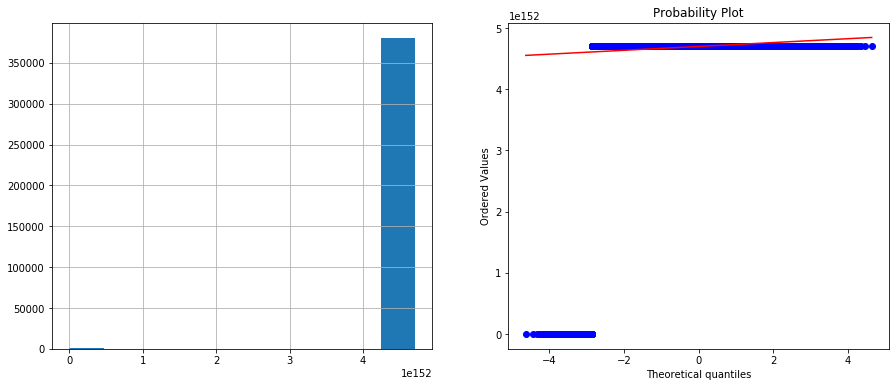

In [101]:
df['Driving_License_boxcox'], param = stats.boxcox(df.Driving_License+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Driving_License_boxcox')

it was found that when a feature is highly imbalanced and only 2 unique values are there
then it is not possible to apply transforming techniques

# Region_Code

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

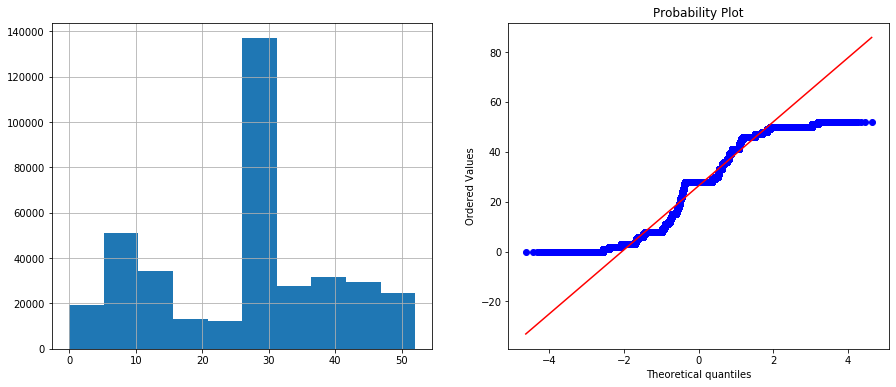

In [114]:
from scipy import stats
diagnostic_plots(df, 'Region_Code')

In [116]:
skew(df['Region_Code'])

-0.11526596121061375

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

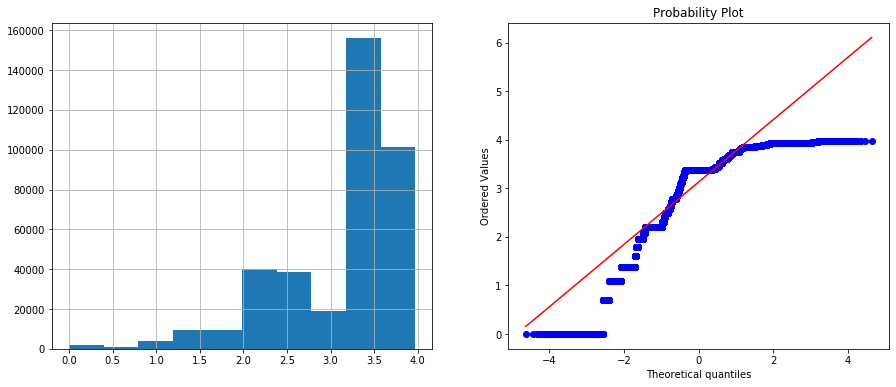

In [118]:
skew(df['Log_Region_Code'])

-1.4247428504337105

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

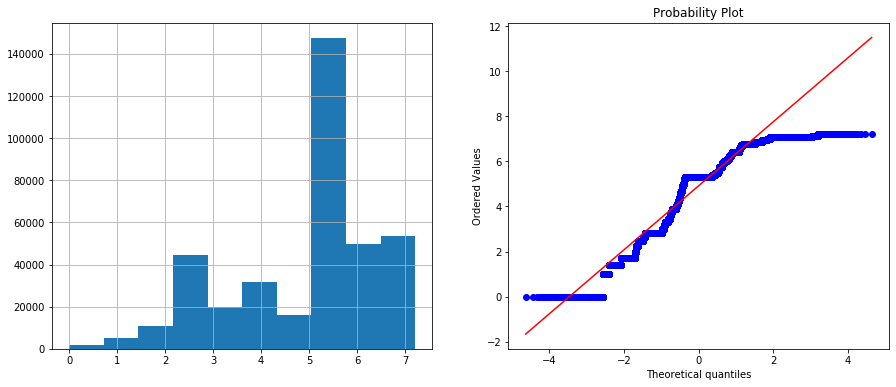

In [119]:
df['sqr_Region_Code']=df['Region_Code']**(1/2)

diagnostic_plots(df,'sqr_Region_Code')

In [120]:
skew(df['sqr_Region_Code'])

-0.7266919543151651

Optimal lambda:  0.883105747743298


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

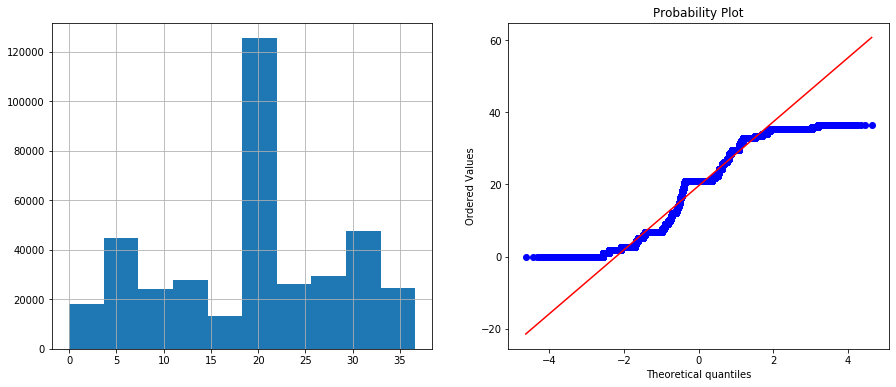

In [121]:
df['Region_Code_boxcox'], param = stats.boxcox(df.Region_Code+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Region_Code_boxcox')

In [122]:
skew(df['Region_Code_boxcox'])

-0.2274343191354768

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

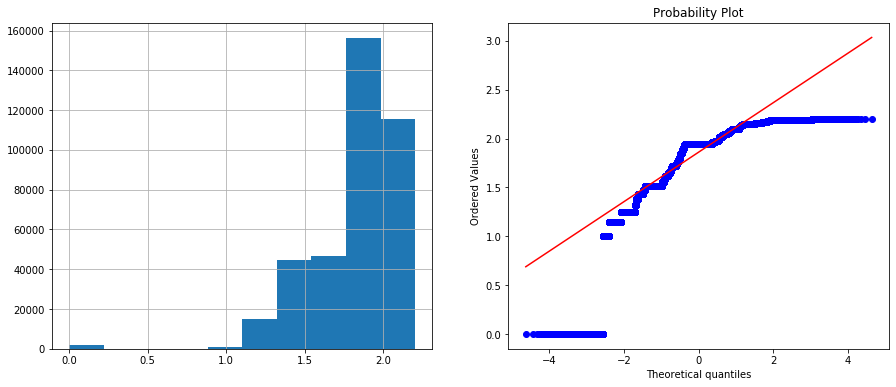

In [123]:
df['Exp_Region_Code']=df['Region_Code']**(1/5)

diagnostic_plots(df,'Exp_Region_Code')

In [124]:
skew(df['Exp_Region_Code'])


-2.1505477586616073

#it was found that there is no use of applying any trans techn since skewness increases when 
compared to original skewness

# Previously_Insured

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

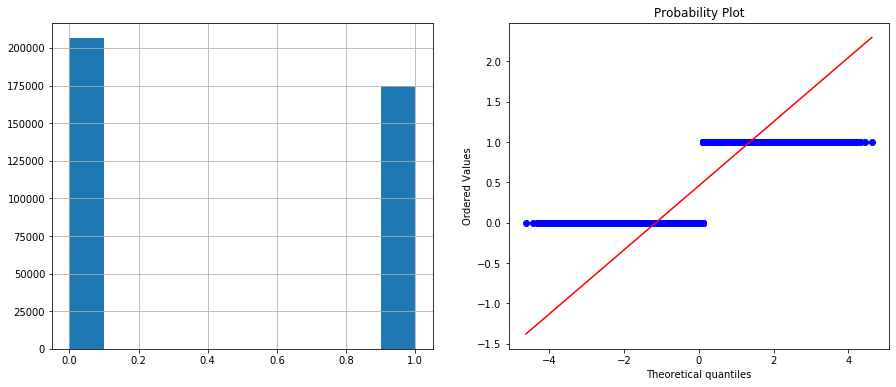

In [11]:
from scipy import stats
diagnostic_plots(df, 'Previously_Insured')

In [12]:
skew(df['Previously_Insured'])

0.16774645622542125

# Sqaure Root Tansformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

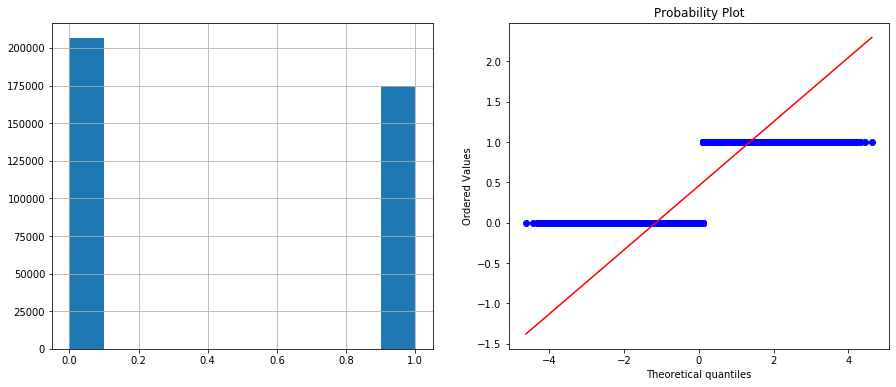

In [13]:
df['sqr_Previously_Insured']=df['Previously_Insured']**(1/2)

diagnostic_plots(df,'sqr_Previously_Insured')

In [14]:
skew(df['sqr_Previously_Insured'])

0.16774645622542125

# boxcox

Optimal lambda:  -0.726533137122429


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

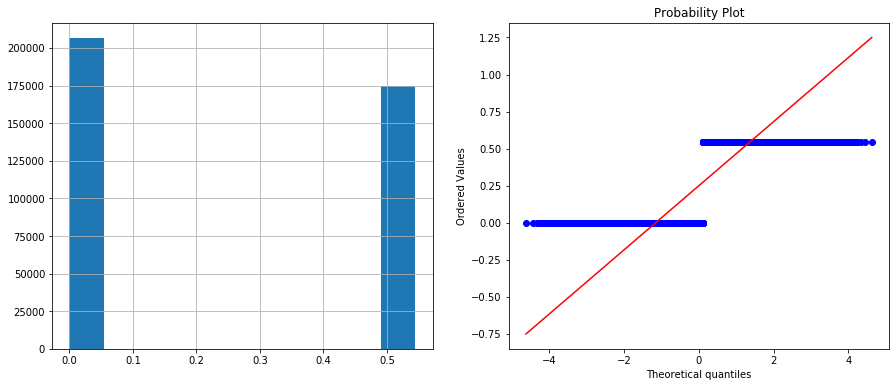

In [15]:
df['Previously_Insured_boxcox'], param = stats.boxcox(df.Previously_Insured+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Previously_Insured_boxcox')

In [16]:
skew(df['Previously_Insured_boxcox'])


0.16774645622542037

#it was found that there is no use of applying any trans techn since skewness remains constant when compared to original skewness

# Annual_Premium

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

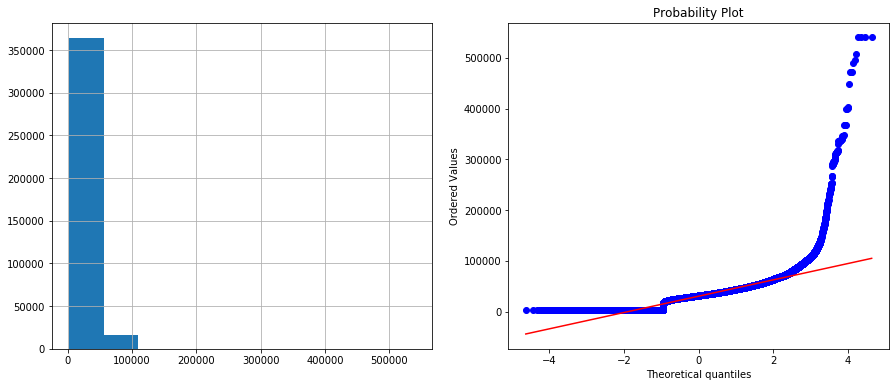

In [18]:
from scipy import stats
diagnostic_plots(df, 'Annual_Premium')

In [19]:
skew(df['Annual_Premium'])

1.7660802637778974

# Sqaure Root Tansformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

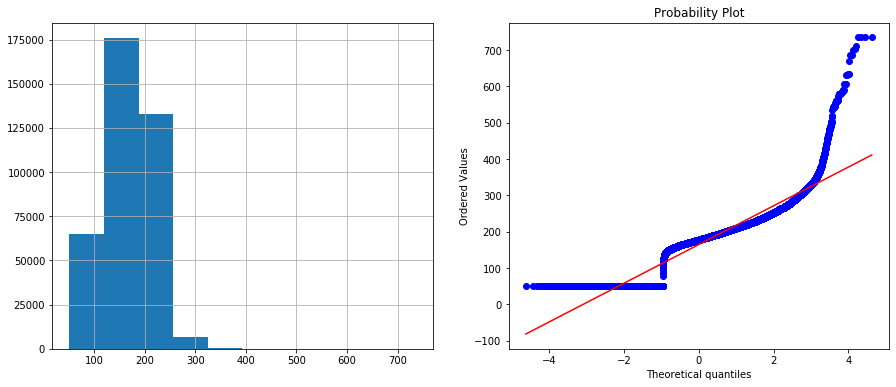

In [20]:
df['sqr_Annual_Premium']=df['Annual_Premium']**(1/2)

diagnostic_plots(df,'sqr_Annual_Premium')

In [21]:
skew(df['sqr_Annual_Premium'])

-0.7919448003035533

# boxcox

Optimal lambda:  0.7669288187012689


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

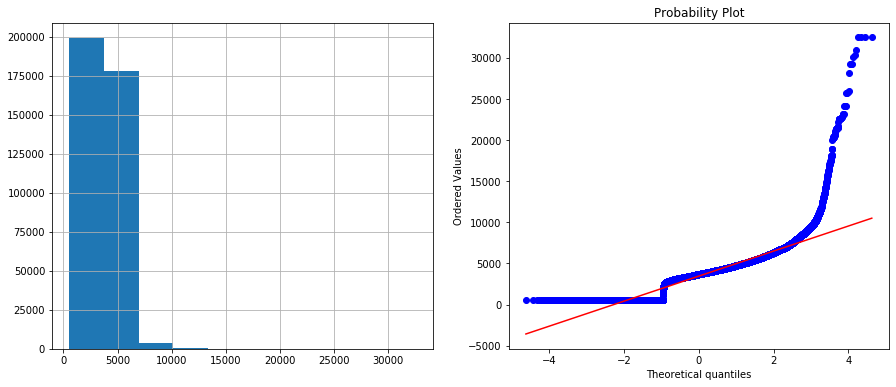

In [22]:
df['Annual_Premium_boxcox'], param = stats.boxcox(df.Annual_Premium+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Annual_Premium_boxcox')

In [23]:
skew(df['Annual_Premium_boxcox'])


0.08322065567590033

it was found that box cox transformation tech is the best one to transform data to nor disb

# Policy_Sales_Channel

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

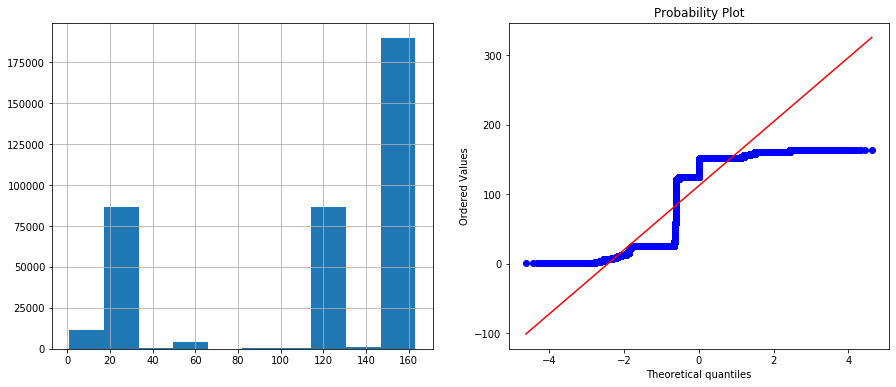

In [26]:
from scipy import stats
diagnostic_plots(df, 'Policy_Sales_Channel')

In [27]:
skew(df['Policy_Sales_Channel'])

-0.900004581180819

# sqrt transformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

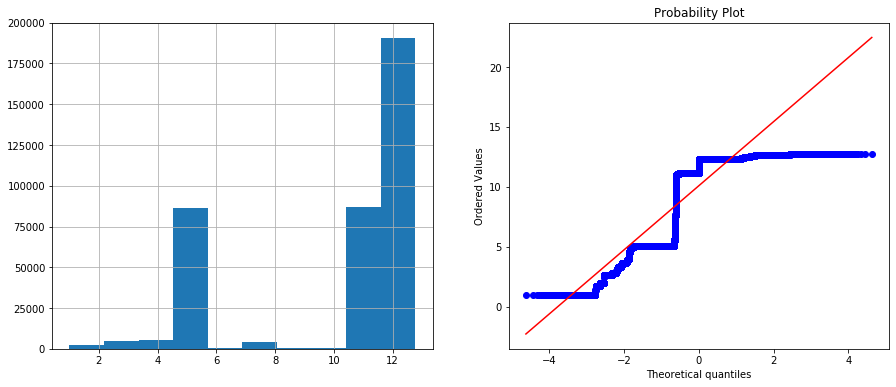

In [24]:
df['sqr_Policy_Sales_Channel']=df['Policy_Sales_Channel']**(1/2)

diagnostic_plots(df,'sqr_Policy_Sales_Channel')

In [25]:
skew(df['sqr_Policy_Sales_Channel'])

-1.0316507882248045

# boxcox

Optimal lambda:  1.483433884765503


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

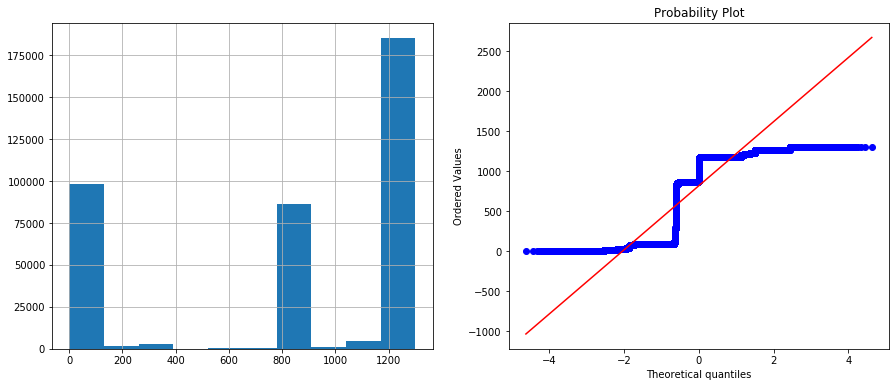

In [28]:
df['Policy_Sales_Channel_boxcox'], param = stats.boxcox(df.Policy_Sales_Channel+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Policy_Sales_Channel_boxcox')

In [29]:
skew(df['Policy_Sales_Channel_boxcox'])


-0.7953198645505194

box cox transformation is a better tech to red skew

# Vintage

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

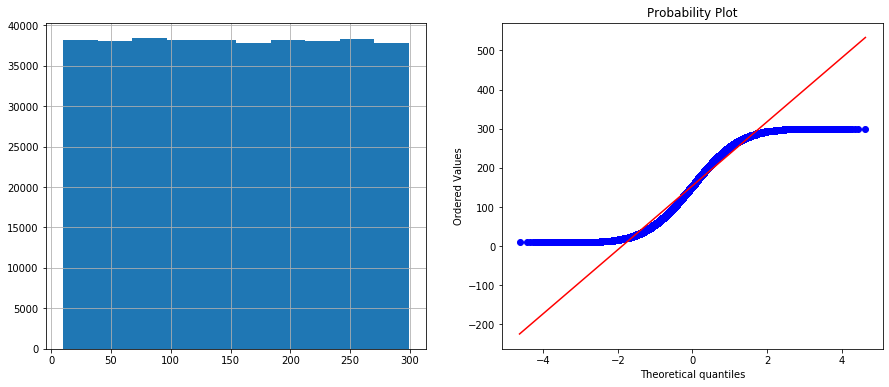

In [30]:
from scipy import stats
diagnostic_plots(df, 'Vintage')

In [32]:
skew(df['Vintage'])

0.003029504966164472

#there is no need to apply any trans tech since it has a very less skew 

# convert categ data into numerical data


# Vehicle_Age

In [35]:
Vehicle_Age = pd.get_dummies(df['Vehicle_Age'])


# vehicle damage

In [37]:
Vehicle_Damage = pd.get_dummies(df['Vehicle_Damage'])


# Gender

In [39]:
Gender = pd.get_dummies(df['Gender'])


In [ ]:
df['Policy_Sales_Channel_boxcox']
df['Annual_Premium_boxcox']
df['Age_boxcox']

In [48]:
x=pd.concat([df['Policy_Sales_Channel_boxcox'],df['Annual_Premium_boxcox'],df['Age_boxcox'],
             df['Driving_License'],df['Region_Code'],df['Previously_Insured'],df['Vintage']
             ,Vehicle_Age,Vehicle_Damage,Gender],axis=1)
x

,Policy_Sales_Channel_boxcox,Annual_Premium_boxcox,Age_boxcox,Driving_License,Region_Code,Previously_Insured,Vintage,1-2 Year,< 1 Year,> 2 Years,No,Yes,Female,Male
0,88.875831,4449.768861,2.001279,1,28.0,0,217,0,0,1,0,1,0,1
1,88.875831,3853.478606,2.113931,1,3.0,0,183,1,0,0,1,0,0,1
2,88.875831,4266.344963,2.016073,1,28.0,0,27,0,0,1,0,1,0,1
3,1173.079931,3412.144299,1.810156,1,11.0,1,203,0,1,0,1,0,0,1
4,1173.079931,3308.946020,1.899463,1,41.0,1,39,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,88.875831,3553.137698,2.108936,1,26.0,1,88,1,0,0,1,0,0,1
381105,1173.079931,4412.762898,1.908298,1,37.0,1,131,0,1,0,1,0,0,1
381106,1265.262871,3992.182474,1.810156,1,30.0,1,161,0,1,0,1,0,0,1
381107,869.005265,4797.005301,2.092772,1,14.0,0,74,0,0,1,0,1,1,0


In [49]:
y=df['Response']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

<IPython.core.display.Javascript object>

(304887, 14)
(76222, 14)


# Logistic reg without balancing

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

C:\Users\mural\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8769908950171866

# balancing highly imb data by smote techn

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1    334399
0    334399
Name: Response, dtype: int64

In [53]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)
print(X_train1.shape)
print(X_test1.shape)

<IPython.core.display.Javascript object>

(535038, 14)
(133760, 14)


# Logistic reg with balancing

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train1, y_train1)
model.score(X_test1,y_test1)

C:\Users\mural\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8099805622009569

 after balancing with smote tech score red slightly